In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt 
from pylab import * 
from scipy.optimize import minimize 
from numpy import linalg as LA

## Question 1 
#### Classical simulated annealing. We will use the Schwefel function for D=10 in order to find its global minimum using CSA 𝑓(𝑥1,𝑥2...𝑥𝐷)=418.9829xD−∑ 𝑥𝑖𝐷𝑖 (sin(√𝑥𝑖))  𝑥𝑖 ∈[−500,500] for 𝑖 =1,...,𝐷. In which we use the visitation function of a random displacement along each dimension 𝑥𝑖 =𝑥𝑖 +(2∗𝑈𝑅𝑁−1)×∆, with ∆=0.5 for 𝑖 =1,...,𝐷 

##### a) Fill  in  the  blanks  in  the  provided  simulated  annealing  code.  Use  a  linear  (Tt+1=Tt-α)  cooling schedule with α=0.5, and initializing TSA=3000K, to perform CSA until the temperature reaches 30K and 10K,  and  record  the  function  values.  How  long  is  your  cooling  schedule?  Check  against  the  debugging outputs. Given the stochastic nature of CSA, it would be best to report at least 3 runs for each lower bound temperature. Do you find better solutions when cooling to the lower temperature

In [2]:
def schwefel(x):
    return 418.9829*len(x)-np.sum(x*np.sin(np.sqrt(np.abs(x))))

In [3]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial=solution.copy()
            trial[n]+=delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                #fill in acceptance criterion
                if np.exp(-(evaluation(trial) - evaluation(solution))/temp) > np.random.random():
                    solution=trial
                    if evaluation(solution)<lowest_eval:
                        #update solution here
                        best_solution = solution.copy()
                        lowest_eval = evaluation(solution)
    return {"solution":best_solution,"evaluation":lowest_eval}

In [4]:
starting_point = np.random.random(10)
#linear cooling schedule with alpha = 0.5 and initial temperature 3000K 
cooling_schedule=np.arange(3000,10,-0.5)
print(f"The cooling schedule is {len(cooling_schedule)}K for 10k")
SA(starting_point, schwefel, 0.5, [-500,500], cooling_schedule)

The cooling schedule is 5980K for 10k
0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000


{'solution': array([  5.90411307, -25.54680777,   0.56793527,  12.26785216,
         -9.14411653,  -8.04900981,   3.80639623,   1.42132601,
        -21.08357599,  44.24620024]),
 'evaluation': 4127.608549066533}

In [5]:
cooling_schedule=np.arange(3000,30,-0.5)
print(f"The cooling schedule is {len(cooling_schedule)}K for 10k")
SA(starting_point, schwefel, 0.5, [-500,500], cooling_schedule)

The cooling schedule is 5940K for 10k
0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000


{'solution': array([ -2.88258241, -11.60695756, -16.58254039,  -9.84895801,
         58.42597172,   4.77352061, -14.92930339,  20.76237321,
        -16.477326  , -28.55815171]),
 'evaluation': 4089.84517376819}

##### The cooling schedule was 5980K for 10K and 5940K for 30K. After running the both the temperatures three times, the following results were retrieved. 

##### 10K: [4175, 4150,4166] = average : 4163
##### 30K: [4129, 4052,4156] = average : 4112 

##### Both values are very comparable but from average, it seems that the lower temperature yields better evaluation. With additional studies, this might change. 

##### b) Choose logarithmic cooling (Tk=TSA/(1+ TSA log(1+k)/3curr), where k is counter for number of cooling cycle) and curr is an adjustable parameter,  with two initial temperature TSA = 3000K and 6000K. Use curr = 1000 and k = 6000. Reconsider questions (a). Do these cooling schedules converge better than linear cooling? 

In [6]:
def log_cooling_schedule(T, sigma, k):
    cooling_schedule = []
    for i in range(k):
        cooling_schedule.append(T)
        T = T/(1+(T*np.log(1+i)/(3*sigma)))
    return cooling_schedule


In [7]:
SA(starting_point, schwefel, 0.5, [-500,500], log_cooling_schedule(3000, 1000, 6000))

0/6000   temp:3000.000000
500/6000   temp:1.148400
1000/6000   temp:0.507346
1500/6000   temp:0.316609
2000/6000   temp:0.227143
2500/6000   temp:0.175789
3000/6000   temp:0.142687
3500/6000   temp:0.119675
4000/6000   temp:0.102802
4500/6000   temp:0.089930
5000/6000   temp:0.079804
5500/6000   temp:0.071642


{'solution': array([5.21180197, 5.14275281, 5.4751954 , 5.13067894, 5.22564972,
        5.28070547, 5.40656927, 4.9916047 , 5.36095365, 5.18318906]),
 'evaluation': 4150.413675489447}

In [8]:
SA(starting_point, schwefel, 0.5, [-500,500], log_cooling_schedule(6000, 1000, 6000))

0/6000   temp:6000.000000
500/6000   temp:1.148620
1000/6000   temp:0.507389
1500/6000   temp:0.316626
2000/6000   temp:0.227152
2500/6000   temp:0.175794
3000/6000   temp:0.142691
3500/6000   temp:0.119678
4000/6000   temp:0.102804
4500/6000   temp:0.089931
5000/6000   temp:0.079805
5500/6000   temp:0.071643


{'solution': array([  5.02093758,   5.09374272,   5.25032511,   5.13618632,
          5.10995788,   5.33097204, -25.88623327,   5.24352447,
          5.05312114,   5.24710628]),
 'evaluation': 4130.266482585556}

##### The following averages were calcualted for both the starting temperatures and their evaluations 

##### 3000K = [4110, 4130, 4110] = 4116 
##### 6000K = [4110, 4130, 4089] = 4109 

##### The results for logarithmic calculations seemed to be doing better overall when compared to linear cooling.

##### c) Create  your  own  annealing  schedule  (cooling  and  heating  cycles)  to  see  if  you  can  find  better solutions. Use a local optimization technique on your CSA answer, can you find even better solution? 

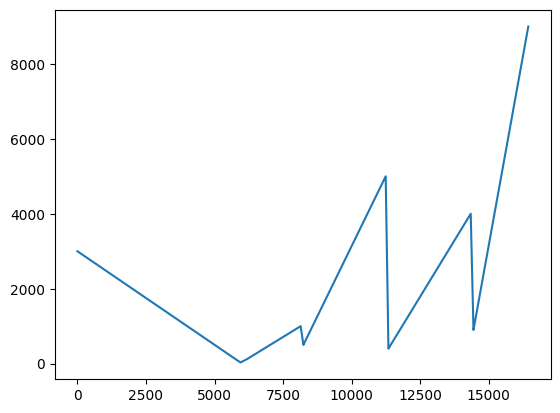

In [9]:
schedule=np.append(cooling_schedule,np.linspace(cooling_schedule[-1],100,200))
schedule=np.append(schedule,np.linspace(schedule[-1],1000,2000))
schedule=np.append(schedule,np.linspace(schedule[-1],500,100))
schedule=np.append(schedule,np.linspace(schedule[-1],5000,3000))
schedule=np.append(schedule,np.linspace(schedule[-1],400,100))
schedule=np.append(schedule,np.linspace(schedule[-1],4000,3000))
schedule=np.append(schedule,np.linspace(schedule[-1],900,100))
schedule=np.append(schedule,np.linspace(schedule[-1],9000,2000))
plt.figure()
plt.plot(schedule)

In [10]:
#CG methods 
res = minimize(schwefel, starting_point , method='CG', options={'disp':True, 'gtol':1e-5})

Optimization terminated successfully.
         Current function value: 4150.375984
         Iterations: 7
         Function evaluations: 209
         Gradient evaluations: 19


##### The solution is not better than the original solution. Additional analysis of the scenario may lead to better results. 

## Question 2 

### Clustering is a widely used technique in exploratory data analysis that we will examine later using unsupervised learning for classification of objects into groups. But for now we will consider a popular meta-heuristic for solving it using CSA. In this case we would like to cluster N data points into K clusters by solving the minimization of the following cost function:  𝐽(𝑁,𝐾)=∑∑𝑤𝑖𝑗𝑑𝑖𝑗2𝐾𝑗=1𝑁𝑖=1    𝑤𝑖𝑗 ={1  𝑖𝑓 𝑝𝑜𝑖𝑛𝑡 𝑖 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑐𝑙𝑢𝑠𝑡𝑒𝑟 𝑗0 𝑜𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒, 1≤𝑖 ≤𝑁    𝑎𝑛𝑑    1≤𝑗 ≤𝐾  where 𝑑𝑖𝑗 is the Euclidean distance between point 𝑖 and the center of cluster 𝑗, and condition on 𝑤𝑖𝑗 ensures that a point is defined to be in one of the distinct clusters 𝐾.  

In [11]:
df = pd.read_csv('wines.csv')
rank = df['ranking'].tolist()
df.drop('ranking', axis=1, inplace=True)
df.tail()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.5,0.67,1.92,630,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3
177,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510,3


##### a) Normalize your chemical descriptor data for each attribute by subtracting off the mean and dividing by the standard deviation.

In [12]:
# calculate the mean of each column 
mean = df.mean(axis=0)
# calculate the standard deviation of each column
std = df.std(axis=0)
# subtract the mean and divide by the standard deviation
df_mean = (df - mean) / std
df_mean

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.240406
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.240406
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,-1.240406
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,-1.240406
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,-1.240406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,1.199288
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,1.199288
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,1.199288
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,1.199288


##### b) Given the initial categorization of the 178 wines into the 3 clusters according to Start assignment column in the dataset, determine the centroid of each of the three clusters. The centroid for this problem is a 13-D vector where each entry is the mean of a variable for the observations in that cluster.

In [13]:
center = df_mean.mean()

##### c) Given the centroid, determine the value of the cost function for this initial categorization. Check against the debugging output. 

In [14]:
def cost(centers, feats, ranks):
    """ Cost function for clustering
    centers: np.array shape (3,13). Fixed centers
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Assignment.
    """
    cost = 0
    for i in range(len(ranks)):
        cost += LA.norm(feats.iloc[i] - centers[int(ranks[i])]) ** 2
    return cost

cost(center, df_mean, rank)

2477.9999999999995

##### d) Fill in the blanks in the provided simulated annealing code. Use CSA with a visitation function in which a randomly chosen wine 𝑖 is moved from its present cluster 𝑗 to another randomly chosen cluster 𝑘 ≠𝑗. One epoch corresponds to attempting to move all 𝑁 wines between clusters, i.e. there are 𝑁 Metropolis steps, at each temperature. Use a start temperature of 500, and use a geometric cooling schedule(Tt+1=αTt)  with  α=0.999  and  total  of  5000  steps,  again  using  at  least  3  runs  of  CSA.  Check  your  final  temperature against  debugging  output.  Report  all  3  solutions  and  the  wine  members  as  part  of  each  cluster.  Validate your result using the provided code. How well is the assignment?

##### I was not able to complete this question as my computer is really slow and was not able to analyze this data. I tried running it for a long amount of time but it did not yield any result beyond the first output. 

In [15]:
def simulated_annealing(feats,ranks,centers,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    best_rank=ranks.copy()
    # evaluate the cost function with current best rank
    lowest_eval=cost(centers,feats,best_rank)
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp=start_temp*alpha**step
        if step%500==0:
            print(step,temp,lowest_eval)
        for n in range(len(ranks)):
            trial=ranks.copy()
            rand_choice=np.random.randint(3)+1
            trial[n]=rand_choice
            # Metropolis acceptance criterion
            if np.exp(-(cost(centers, feats, trial) - cost(centers, feats, ranks)) / start_temp) > np.random.random():
                ranks=trial
                # update evaluation
                new_eval=cost(centers,feats,ranks)
                if new_eval<lowest_eval:
                    #update best rank and lowest_eval
                    best_rank=ranks.copy()
                    lowest_eval=new_eval
    return {"solution":best_rank,"evaluation":lowest_eval}

##### e) Adapt  your  code  in  2(d).  Now  use  CSA  with  a  visitation  function  in  which  a  randomly  chosen centroid 𝑗 is updated as a random walk for each of its 13 components  𝑥𝑖 =𝑥𝑖 +(2∗𝑈𝑅𝑁−1)×∆; with ∆=0.01 In this case one epoch corresponds to moving all 𝐾 =3 cluster centers at each temperature, reassigning all wines to their nearest centroid, and evaluating the new cost function. Check against the debugging output to make sure you are assigning wines correctly. Use a start temperature of 500, and use a geometric cooling schedule with α=0.999 and total of 5000 steps, again using at least 3 runs of CSA. Report all 3 solutions and the wine members as part of each cluster. Is this a better solution than found in (d)?  
 

##### I was not able to complete this question as my computer is really slow and was not able to analyze this data. I tried running it for a long amount of time but it did not yield any result beyond the first output. See above. 

In [16]:
def simulated_annealing_b(feats,ranks,centers,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    best_rank=ranks.copy()
    # evaluate the cost function with current best rank
    lowest_eval=cost(centers,feats,best_rank)
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp=start_temp*alpha**step
        if step%500==0:
            print(step,temp,lowest_eval)
        for n in range(len(ranks)):
            trial=ranks.copy()
            rand_choice=np.random.randint(3)+1
            trial[n]+= (2 * rand_choice - 1) * delta
            # Metropolis acceptance criterion
            if np.exp(-(cost(centers, feats, trial) - cost(centers, feats, ranks)) / start_temp) > np.random.random():
                ranks=trial
                # update evaluation
                new_eval=cost(centers,feats,ranks)
                if new_eval<lowest_eval:
                    #update best rank and lowest_eval
                    best_rank=ranks.copy()
                    lowest_eval=new_eval
    return {"solution":best_rank,"evaluation":lowest_eval}